In [12]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [13]:
import os
print(os.getcwd())

C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithemtic\IPyNb


In [14]:
df = pd.read_csv("../Python/Output/PolyNearOne.txt", sep='\t')
df.head()

,Type,Epsilon,Order,Value Error,Uncertainty
0,Plus,0.9,0,0.090909,6.409876e-17
1,Minus,0.9,0,0.111111,1.281975e-16
2,Plus,0.9,1,0.009091,6.509259e-17
3,Minus,0.9,1,0.011111,1.286973e-16
4,Plus,0.9,2,0.000909,6.492255e-17


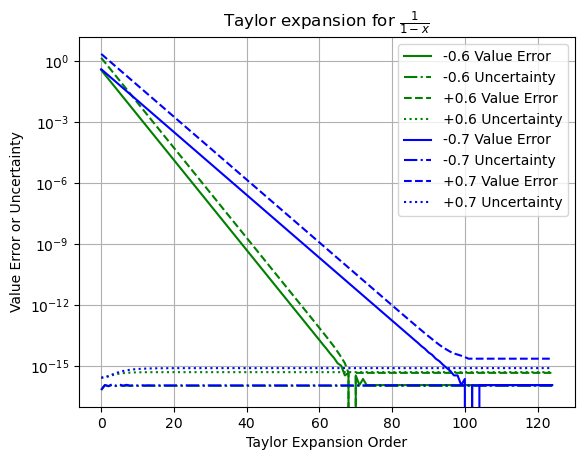

In [62]:
fig, ax = plt.subplots()
ax.set_title(r'Taylor expansion for $\frac{1}{1 - x}$')
ax.set_xlabel('Taylor Expansion Order')
ax.set_ylabel('Value Error or Uncertainty')
ax.set_yscale('log')
#ax.set_ylim(ylim)
plt.grid(True)
    
for epsilon, color in zip((0.4, 0.3), ('g', 'b', 'c')):   
    dfPlus = df[(df['Epsilon']==epsilon) & (df['Type']=='Plus')]
    dfMinus = df[(df['Epsilon']==epsilon) & (df['Type']=='Minus')]
    ax.plot(dfPlus['Order'], dfPlus['Value Error'], color+'-', label=f'-{1 - epsilon} Value Error')
    ax.plot(dfPlus['Order'], dfPlus['Uncertainty'], color+'-.', label=f'-{1 -epsilon} Uncertainty')
    ax.plot(dfMinus['Order'], dfMinus['Value Error'], color+'--', label=f'+{1 - epsilon} Value Error')
    ax.plot(dfMinus['Order'], dfMinus['Uncertainty'], color+':', label=f'+{1 - epsilon} Uncertainty')

ax.legend(bbox_to_anchor=(1.0, 1.0))

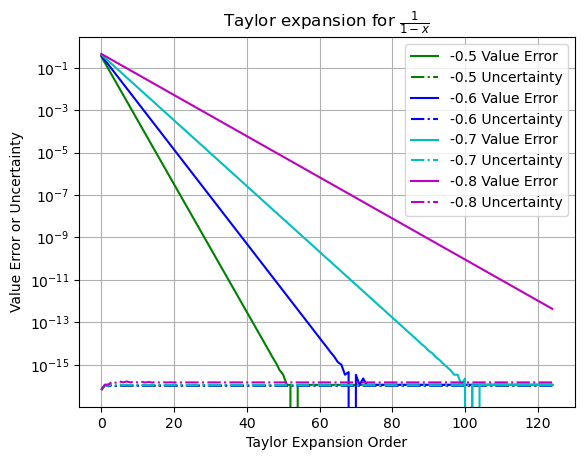

In [68]:
fig, ax = plt.subplots()
ax.set_title(r'Taylor expansion for $\frac{1}{1 - x}$')
ax.set_xlabel('Taylor Expansion Order')
ax.set_ylabel('Value Error or Uncertainty')
ax.set_yscale('log')
#ax.set_ylim(ylim)
plt.grid(True)
    
for epsilon, color in zip((0.5, 0.4, 0.3, 0.2), ('g', 'b', 'c', 'm')):   
    dfPlus = df[(df['Epsilon']==epsilon) & (df['Type']=='Plus')]
    dfMinus = df[(df['Epsilon']==epsilon) & (df['Type']=='Minus')]
    ax.plot(dfPlus['Order'], dfPlus['Value Error'], color+'-', label=f'-{1 - epsilon} Value Error')
    ax.plot(dfPlus['Order'], dfPlus['Uncertainty'], color+'-.', label=f'-{1 -epsilon} Uncertainty')
    #ax.plot(dfMinus['Order'], dfMinus['Value Error'], color+'--', label=f'+{1 - epsilon} Value Error')
    #ax.plot(dfMinus['Order'], dfMinus['Uncertainty'], color+':', label=f'+{1 - epsilon} Uncertainty')

ax.legend(bbox_to_anchor=(1.0, 1.0))

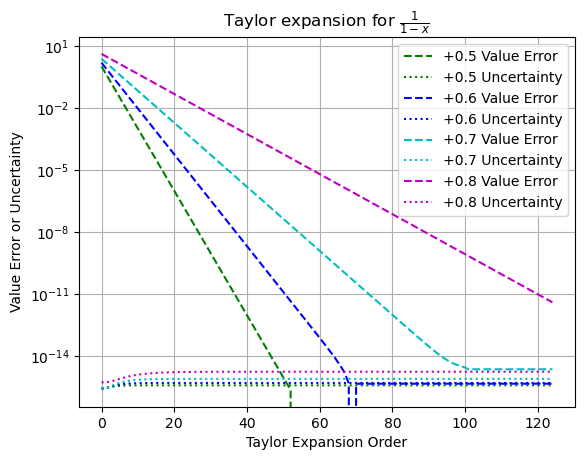

In [66]:
fig, ax = plt.subplots()
ax.set_title(r'Taylor expansion for $\frac{1}{1 - x}$')
ax.set_xlabel('Taylor Expansion Order')
ax.set_ylabel('Value Error or Uncertainty')
ax.set_yscale('log')
#ax.set_ylim(ylim)
plt.grid(True)
    
for epsilon, color in zip((0.5, 0.4, 0.3, 0.2), ('g', 'b', 'c', 'm')):   
    dfPlus = df[(df['Epsilon']==epsilon) & (df['Type']=='Plus')]
    dfMinus = df[(df['Epsilon']==epsilon) & (df['Type']=='Minus')]
    #ax.plot(dfPlus['Order'], dfPlus['Value Error'], color+'-', label=f'-{1 - epsilon} Value Error')
    #ax.plot(dfPlus['Order'], dfPlus['Uncertainty'], color+'-.', label=f'-{1 -epsilon} Uncertainty')
    ax.plot(dfMinus['Order'], dfMinus['Value Error'], color+'--', label=f'+{1 - epsilon} Value Error')
    ax.plot(dfMinus['Order'], dfMinus['Uncertainty'], color+':', label=f'+{1 - epsilon} Uncertainty')

ax.legend(bbox_to_anchor=(1.0, 1.0))

In [69]:
df[(df['Epsilon']==0.6) & (df['Type']=='Minus') & (df['Order']>100)].head(100)

,Type,Epsilon,Order,Value Error,Uncertainty
953,Minus,0.6,101,4.440892e-16,1.603545e-16
955,Minus,0.6,102,4.440892e-16,1.603545e-16
957,Minus,0.6,103,4.440892e-16,1.603545e-16
959,Minus,0.6,104,4.440892e-16,1.603545e-16
961,Minus,0.6,105,4.440892e-16,1.603545e-16
963,Minus,0.6,106,4.440892e-16,1.603545e-16
965,Minus,0.6,107,4.440892e-16,1.603545e-16
967,Minus,0.6,108,4.440892e-16,1.603545e-16
969,Minus,0.6,109,4.440892e-16,1.603545e-16
971,Minus,0.6,110,4.440892e-16,1.603545e-16


In [70]:
df[(df['Epsilon']==0.7) & (df['Type']=='Minus') & (df['Order']>100)].head(100)

,Type,Epsilon,Order,Value Error,Uncertainty
703,Minus,0.7,101,2.220446e-16,1.476789e-16
705,Minus,0.7,102,2.220446e-16,1.476789e-16
707,Minus,0.7,103,2.220446e-16,1.476789e-16
709,Minus,0.7,104,2.220446e-16,1.476789e-16
711,Minus,0.7,105,2.220446e-16,1.476789e-16
713,Minus,0.7,106,2.220446e-16,1.476789e-16
715,Minus,0.7,107,2.220446e-16,1.476789e-16
717,Minus,0.7,108,2.220446e-16,1.476789e-16
719,Minus,0.7,109,2.220446e-16,1.476789e-16
721,Minus,0.7,110,2.220446e-16,1.476789e-16
